In [2]:
import pandas
import seaborn
import scipy
import pylab

import matplotlib.pyplot as pyplot
%matplotlib inline

import scipy.stats as stats

In [3]:
def convert_to_float(value):
    """
    Преобразование значений в столбцах датафрейма;

    :param value: float
    :return: float
    """
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value

## Задачи исследования
1. Отличаются ли пелены от бинтов по параметрам?
2. Отличаются ли узкие, средние и широкие бинты друг от друга по параметрам?
3. Каков процент рогожки?
4. Какие группы тканей по качеству получаются?
5. Различаются ли нити основы и нити утка?
6. Какое количество (процент) тканей высокого качества имеют сбалансированное переплетение?
7. Какое количество (процент) тканей среднего качества имеет сбалансированное переплетение?
8. Какое количество (процент) тканей ниского качества имеет сбалансированное переплетение?
9. Каково соотношение сбалансированных тканей и тканей с преобладанием нитей основы?
10. Высчитать "коэффициент заполняемости" тканей
11. Разделить ткани по сбалансированности (сбалансированные - ±3 нити; ткани с преобладанием нитей основы); рассчитать процент каждой группы

### Описание датафрейма
1. 'internal_storage' - номер по каталогу
2. 'grave' - номер могилы
3. 'warp_size' - размер изделия по основе
4. 'weft_size' - размер изделия по утку
5. 'type' - тип изделия
6. 'condition' - сохранность изделия
7. 'weaving_technique'
8. 'warp_material' - материал нитей основы
9. 'weft_material' - материал нитей утка
10. 'warp_dyed' - окрашивание нитей основы
11. 'weft_dyed' - окрашивание нитей утка
12. 'warp_twist' -  крутка нитей основы
13. 'weft_twist' - крутка нитей утка
14. 'warp_angle'
15. 'weft_angle'
16. 'warp_a' - толщина нитей основы (нижний предел)
17. 'warp_b' - толщина нитей основы (верхний предел)
18. 'weft_a' - толщина нитей утка (нижний предел)
19. 'weft_b' - толщина нитей утка (верхний предел)
20. 'warp_dens' - плотность по основе
21. 'weft_dens' - плотность по утку  
* * *
Числовые параметры - warp_size, wef_size, warp_a, warp_b, weft_a, weft_b, warp_mean, weft_mean, warp_dens, weft_dens

## Формирование основного датафрейма

In [26]:
# Загрузка данных из файла;
dataframe = pandas.read_csv('raw_data/dataframe.csv')
dataframe = pandas.DataFrame(dataframe[
                                 ['grave', 'internal_storage', 'warp_size', 'weft_size', 'type', 'condition',
                                  'weaving_technique', 'warp_material', 'weft_material', 'warp_dyed',
                                  'weft_dyed', 'twist_warp', 'twist_weft', 'angle_warp', 'angle_weft',
                                  'warp_a', 'warp_b', 'weft_a', 'weft_b', 'warp_dens', 'weft_dens']
                             ])

# приведение типов столбцов таблицы;
dataframe['warp_a'] = dataframe.warp_a.apply(convert_to_float)
dataframe['warp_b'] = dataframe.warp_b.apply(convert_to_float)
dataframe['weft_a'] = dataframe.weft_a.apply(convert_to_float)
dataframe['weft_b'] = dataframe.weft_b.apply(convert_to_float)

# рассчет средних значений толщин нитей по основе и по утку;
# получаемые значения округляются до 2 знаков после запятой;
dataframe['warp_mean'] = round((dataframe['warp_a'] + dataframe['warp_b']) / 2, 2)
dataframe['weft_mean'] = round((dataframe['weft_a'] + dataframe['weft_b']) / 2, 2)

# "Коэффициент плотности" - соотношение плотности по основе к плотности по утку;
dataframe['density_coefficient'] = round(dataframe['warp_dens'] / dataframe['weft_dens'], 2)

# удаление строк с пропущенными и нулевыми значениями;
dataframe = dataframe.dropna()

# Исходный объем датафрейма
dataframe_length = len(dataframe)

# Очистка от "выбросов"
dataframe_cleared = dataframe[dataframe.warp_mean < 1]
dataframe_cleared = dataframe_cleared[dataframe_cleared.weft_mean < 1]
print(len(dataframe_cleared))

258


## Формирование датафреймов по группам тканей

In [5]:
# Выборка данных из подготовленного датафрейма;
# Предполагается, что для сбалансированных тканей разница между плотностью
# по основе и плотностью по утку не должна превышать 3 единиц;
balanced = dataframe[abs(dataframe['warp_dens'] - dataframe['weft_dens']) <= 3]
unbalanced = dataframe[abs(dataframe['warp_dens'] - dataframe['weft_dens']) > 3]

# Ткани с переплетением типа "рогожка";
baskets = dataframe[dataframe['weaving_technique'] == 'basket']

# выборка узких бинтов;
narrow_bands = dataframe[dataframe['type'] == 'n_band']

# выборка средних бинтов;
middle_bands = dataframe[dataframe['type'] == 'm_band']

# выборка широких бинтов;
wide_bands = dataframe[dataframe['type'] == 'w_band']

# все бинты (всех типов)
all_bands = pandas.concat([narrow_bands, middle_bands, wide_bands])

### Описательные статистики для полного датафрейма

## Графики распределения числовых параметров

### 1 - Толщина нитей основы (усредненное значение)

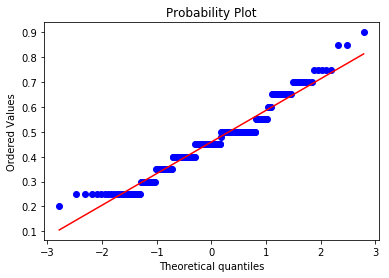

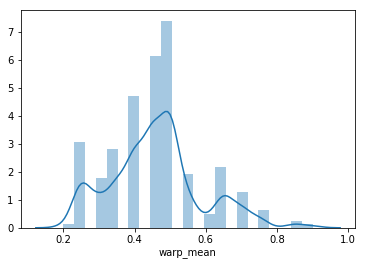

In [31]:
stats.probplot(dataframe['warp_mean'], dist="norm", plot=pylab)
pylab.show()
seaborn.distplot(dataframe['warp_mean'])

In [33]:
shapiro_warp_mean = stats.shapiro(dataframe.warp_mean.values)
shapiro_warp_mean_p_coefficient = shapiro_warp_mean[1]
print('{:.20f}'.format(shapiro_warp_mean_p_coefficient))
if shapiro_warp_mean_p_coefficient > 0.05:
    print('True')
else:
    print('False')

0.00000000000624036369
False


### 2 - Толщина нитей утка (усредненное значение)

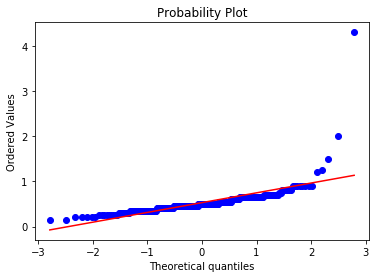

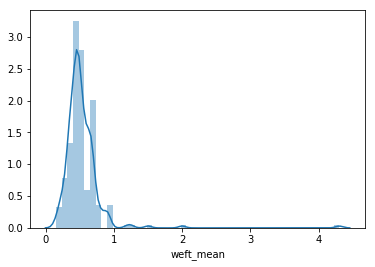

In [19]:
stats.probplot(dataframe.weft_mean, dist="norm", plot=pylab)
pylab.show()
seaborn.distplot(dataframe['weft_mean'])

In [20]:
shapiro_weft_mean = stats.shapiro(dataframe['weft_mean'].values)
shapiro_weft_mean_p_coefficient = shapiro_weft_mean[1]
print('{:.20f}'.format(shapiro_weft_mean_p_coefficient))
if shapiro_weft_mean_p_coefficient > 0.05:
    print('True')
else:
    print('False')

0.00000000000000000000
False


### 3 - Плотность по основе

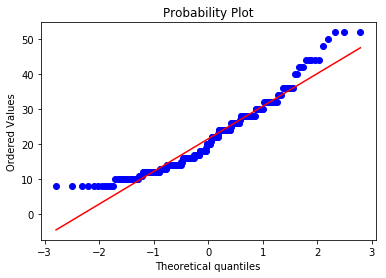

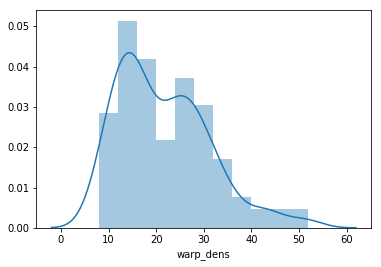

In [21]:
stats.probplot(dataframe.warp_dens, dist="norm", plot=pylab)
pylab.show()
seaborn.distplot(dataframe['warp_dens'])

In [22]:
shapiro_warp_dens = stats.shapiro(dataframe.warp_dens.values)
shapiro_warp_dens_p_coefficient = shapiro_warp_dens[1]
print('{:.20f}'.format(shapiro_warp_dens_p_coefficient))
if shapiro_warp_dens_p_coefficient > 0.05:
    print('True')
else:
    print('False')

0.00000000251835974296
False


### 4 - Плотность по утку

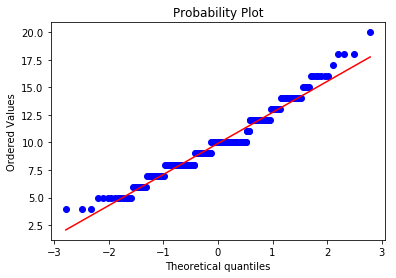

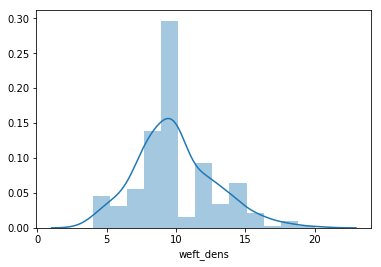

In [23]:
stats.probplot(dataframe.weft_dens, dist="norm", plot=pylab)
pylab.show()
seaborn.distplot(dataframe['weft_dens'])

In [24]:
shapiro_weft_dens = stats.shapiro(dataframe.weft_dens.values)
shapiro_weft_dens_p_coefficient = shapiro_weft_dens[1]
print('{:.20f}'.format(shapiro_weft_dens_p_coefficient))
if shapiro_weft_dens_p_coefficient > 0.05:
    print('True')
else:
    print('False')

0.00000114719921384676
False


### 1 - Отличаются ли пелены от бинтов по параметрам?
* * *
- Получить датафреймы содержащие только пелены и только бинты (все, независимо от типа)
- Рассчитать меры центральной тенденции для обоих наборов
* * *

### 2 - Отличаются ли узкие, средние и широкие бинты по параметрам?
* * *

### 3 - Какой процент рогожки?
* * *

### 4 - Какие группы тканей по качеству получаются?
* * *

### 5 - Различаются ли нити основы и нити утка?
* * *

### 6 - Какое количество (процент) тканей высокого качества имеют сбалансированное переплетение?
* * *

### 7 - Какое количество (процент) тканей среднего качества имеет сбалансированное переплетение?
* * *

### 8 - Какое количество (процент) тканей ниского качества имеет сбалансированное переплетение?
* * *

### 9 - Каково соотношение сбалансированных тканей и тканей с преобладанием нитей основы?
* * *

### 10 - Высчитать "коэффициент заполняемости" тканей
* * *

### 11 - Разделить ткани по сбалансированности (сбалансированные - ±3 нити; ткани с преобладанием нитей основы); рассчитать процент каждой группы
* * *